In [2]:
#imports:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#distribution of numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.Survived.unique()

array([0, 1], dtype=int64)

In [6]:
# Survived column has two values. 0 means that the person did not survive. 1 --> Survived

In [7]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [8]:
#Pclass is the ticket class. It has 3 classes. 1st, 2nd and 3rd.

In [9]:
#SibSp --> Number of siblings/Spouses.
#Parch --> Number of parents/Children.
#fare --> Ticket price.
#cabin --> cabin number.

In [10]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
#embarked --> place of boarding 
#C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
#check missing values

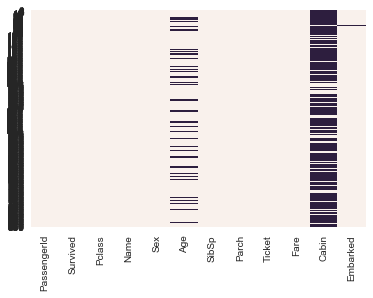

In [13]:
sns.heatmap(titanic.isnull(), cbar=False )

In [14]:
#we can see that cabin has mostly missing values and in age some values are missing.

In [15]:
titanic.shape

(891, 12)

In [16]:
#it has 891 rows and 12 columns

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

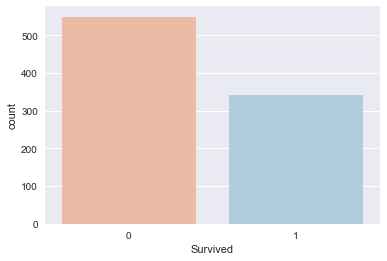

In [18]:
sns.countplot( titanic.Survived , palette = "RdBu")


In [19]:
#Around 550 did not survive and around 350 survived

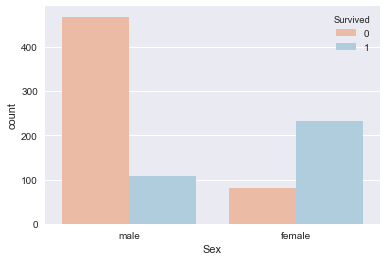

In [20]:
sns.countplot(titanic.Sex, hue=titanic.Survived , palette = "RdBu")

In [21]:
#we can observe that survival rate of female is higher than male.

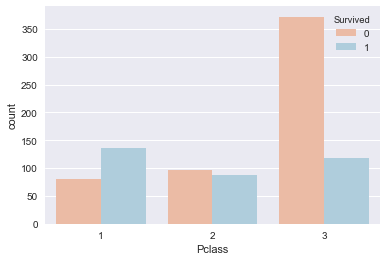

In [22]:
sns.countplot(titanic.Pclass, hue=titanic.Survived , palette = "RdBu")

In [23]:
#many people from class 3 did not survive.
#titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count().sort_values(by='Survived', ascending=False)

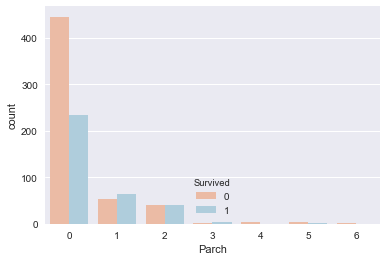

In [24]:
sns.countplot(titanic.Parch, hue=titanic.Survived , palette = "RdBu")

In [25]:
#there were many singles/ couples without children travelling.

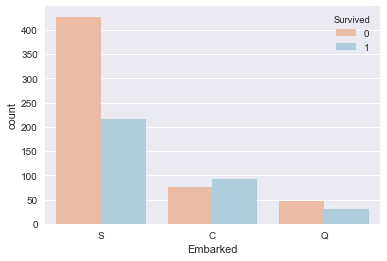

In [26]:
sns.countplot(titanic.Embarked, hue=titanic.Survived , palette = "RdBu")

In [27]:
#there is some slight correlation between Embarked and Survived columns. We shall keep this for training our model

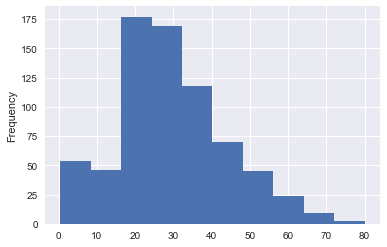

In [28]:
titanic.Age.plot.hist()
#pandas built in viualization

In [29]:
#most passengers had age in the range 20 to 40

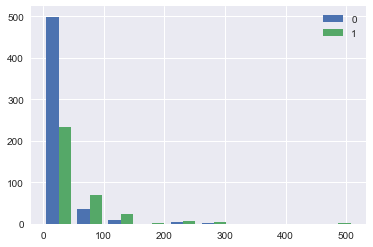

In [30]:
Survived = titanic.Survived.unique()
plt.hist([titanic.loc[titanic.Survived == x, 'Fare'] for x in Survived], label=Survived)
plt.legend()

In [31]:
#most people had paid less Fare. The chances of survival was high for those who paid higer fare.

In [32]:
#filling out missing data


In [33]:
#Age

In [34]:
titanic.Age.mean()

29.69911764705882

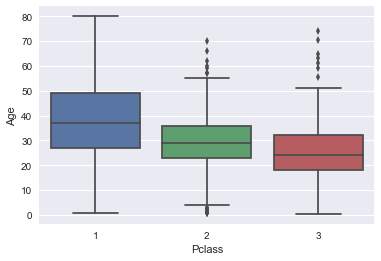

In [35]:
sns.boxplot(x=titanic.Pclass,y=titanic.Age)

In [36]:
#titanic.loc[titanic.Pclass == 1].loc[titanic.Age.isnull()] 
titanic.loc[(titanic.Pclass == 1) & (titanic.Age.isnull())] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C


In [37]:
titanic.loc[(titanic.Pclass == 1) & (titanic.Age.isnull())] .shape

(30, 12)

In [38]:
#So we have around 30 rows with missing age and PClass 1
#We shall fill them with age = 38

In [39]:
titanic.loc[(titanic.Pclass == 1) & (titanic.Age.isnull()) , 'Age'] = 38 

In [40]:
titanic.loc[(titanic.Pclass == 1) & (titanic.Age.isnull())] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [41]:
titanic.loc[(titanic.Pclass == 2) & (titanic.Age.isnull())] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S


In [42]:
#We will fill the missing ages with 29 here

In [43]:
titanic.loc[(titanic.Pclass == 2) & (titanic.Age.isnull()) , 'Age'] = 29

In [44]:
titanic.loc[(titanic.Pclass == 1) & (titanic.Age.isnull())] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [45]:
titanic.loc[(titanic.Pclass == 3) & (titanic.Age.isnull())].shape 

(136, 12)

In [46]:
#136 rows. We will fill missing age with 25 for PClass 3

In [47]:
titanic.loc[(titanic.Pclass == 3) & (titanic.Age.isnull()) , 'Age'] = 25

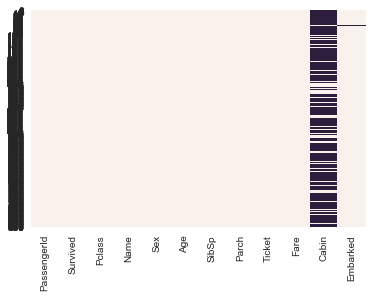

In [48]:
sns.heatmap(titanic.isnull(), cbar=False )

In [49]:
#Next we shall fill Embarked column

In [50]:
titanic.loc[titanic.Embarked.isnull()].shape 

(2, 12)

In [51]:
#Since there are only 2 missing values, we will replace with value having maxmimu records.

In [52]:
titanic.groupby('Embarked')['PassengerId'].nunique()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [53]:
titanic.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [54]:
titanic.loc[titanic.Embarked.isnull(), 'Embarked'] = 'S'

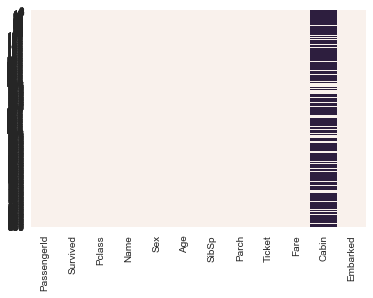

In [55]:
sns.heatmap(titanic.isnull(), cbar=False )

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
#We shall drop columns 'PassengerId','Name','Ticket','Cabin' 

In [58]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin' ],axis=1)

In [59]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [60]:
#Since machine learning algorithms work with only numerical data, we will encode text to numerical

In [61]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [62]:
titanic.loc[titanic.Sex == 'female', 'Sex'] = 0
titanic.loc[titanic.Sex == 'male', 'Sex'] = 1

In [63]:
titanic.groupby('Sex').size()

Sex
0    314
1    577
dtype: int64

In [64]:
#We will do the same thing with Embarked column

In [65]:
titanic.groupby('Embarked').size()

Embarked
C    168
Q     77
S    646
dtype: int64

In [66]:
titanic.loc[titanic.Embarked == 'C', 'Embarked'] = 0
titanic.loc[titanic.Embarked == 'Q', 'Embarked'] = 1
titanic.loc[titanic.Embarked == 'S', 'Embarked'] = 2

In [67]:
titanic.groupby('Embarked').size()

Embarked
0    168
1     77
2    646
dtype: int64

In [68]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [69]:
#Declaring our input and output/target columns:

In [70]:
X = titanic.drop(['Survived'],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [71]:
y = titanic.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
#training and testing data:

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [75]:
X_train.shape

(623, 7)

In [76]:
X_test.shape

(268, 7)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logregmodel = LogisticRegression()

In [79]:
logregmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
y_pred = logregmodel.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test, y_pred)

0.7985074626865671

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       171
          1       0.74      0.69      0.71        97

avg / total       0.80      0.80      0.80       268



In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtreemodel = DecisionTreeClassifier()

In [87]:
dtreemodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [88]:
y_pred = dtreemodel.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred)

0.7873134328358209

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfmodel = RandomForestClassifier()

In [94]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [95]:
y_pred = rfmodel.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.8208955223880597